# Unit 3 Final Project

Before you get started on your project, take a moment to review how you can make requests from the following APIs:
- **ESPN**
- **TikTok**
- **X**
- **Spotify**

First, you will need to set up your API credentials:
   - **Spotify**: `SPOTIFY_CLIENT_ID` and `SPOTIFY_CLIENT_SECRET` from https://developer.spotify.com/dashboard
   - **X (Twitter)**: `X_BEARER_TOKEN` from https://developer.twitter.com/en/portal/dashboard
   - **TikTok**: No authentication required!
   - **ESPN**: No authentication required!

In [2]:
# Import required libraries
import requests
import json
import random
import asyncio
import os

## 1. Spotify API - Random Song

In [ ]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "ADD YOUR ID HERE"
SPOTIFY_CLIENT_SECRET = "ADD YOUR SECRET HERE"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [25]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])

<Response [200]>
Brenda Lee
Rockin' Around The Christmas Tree


## 2. X (Twitter) API - Random Recent Post

In [27]:
# Setup API authorization before making request

X_BEARER_TOKEN = "ADD YOUR BEARER TOKEN HERE"

headers = {
    'Authorization': f'Bearer {X_BEARER_TOKEN}'
}

In [28]:
# Search for recent tweets about a random topic
search_topic = random.choice(['sports', 'technology', 'music', 'news', 'science'])
x_response = requests.get(
    'https://api.twitter.com/2/tweets/search/recent',
    headers=headers,
    params={
        'query': f'{search_topic} -is:retweet lang:en',
        'max_results': 10,
        'tweet.fields': 'created_at,public_metrics,author_id'
    }
)

x_data = x_response.json()
if 'data' in x_data and x_data['data']:
    random_tweet = random.choice(x_data['data'])
    print(f"\nRandom Tweet Found (Topic: {search_topic}):")
    print(f"  Text: {random_tweet['text'][:200]}...")
    if 'public_metrics' in random_tweet:
        print(f"  Likes: {random_tweet['public_metrics'].get('like_count', 0)}")
        print(f"  Retweets: {random_tweet['public_metrics'].get('retweet_count', 0)}")


Random Tweet Found (Topic: sports):
  Text: After dropping to No. 7 in the latest CFP rankings, Texas A&amp;M HC Mike Elko is asking for more clarity regarding the Aggies' surprising drop. https://t.co/o3GVk8ljpQ...
  Likes: 0
  Retweets: 0


## 3. TikTok API - Random Trending Video

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because access to a browser like chromium.*

In [4]:
!pip install TikTokApi
!playwright install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 57.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [TikTokApi]/4 [TikTokApi]]
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/chromium-1140
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/ffmpeg-1010
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/firefox-1465
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/webkit-2083
129.7 MiB [                    ] 0% 0.0s129.7 MiB [                    ] 0% 57.7s129.7 MiB [                    ] 0% 39.7s129.7 MiB [                    ] 0% 39.2s129.7 MiB [                    ] 0% 34.4s129.7 MiB [                    ] 0% 28.1s129.7 MiB [                    ] 0% 24.0s129.7 MiB [                    ] 0% 20.0s129.7 MiB [                    ] 0% 15.4s129.7 MiB [                    ] 1% 12.3s129.7 MiB [                    ] 1% 10.4s129.7 MiB [                    ] 2% 

In [7]:
from TikTokApi import TikTokApi

async def get_tiktok_video():
    async with TikTokApi() as api:
        await api.create_sessions(
            ms_tokens=[os.environ.get("ms_token")],
            num_sessions=1,
            sleep_after=3,
            headless=False  # ← Makes browser visible!
        )
        
        videos = []
        async for video in api.trending.videos(count=10):
            videos.append(video)
        
        if videos:
            video = random.choice(videos)
            print(f"Found video by @{video.author.username}")
            print(f"URL: https://www.tiktok.com/@{video.author.username}/video/{video.id}")

await get_tiktok_video()

Found video by @nne_hub
URL: https://www.tiktok.com/@nne_hub/video/7546892254019964215


## 4. ESPN API (Hidden) - Random Basketball Game

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because the cloud permission settings appear to block ESPN.*

In [3]:
espn_response = requests.get(
    'http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard'
)

espn_data = espn_response.json()
espn_data

{'leagues': [{'id': '46',
   'uid': 's:40~l:46',
   'name': 'National Basketball Association',
   'abbreviation': 'NBA',
   'slug': 'nba',
   'season': {'year': 2026,
    'startDate': '2025-10-01T07:00Z',
    'endDate': '2026-06-27T06:59Z',
    'displayName': '2025-26',
    'type': {'id': '2',
     'type': 2,
     'name': 'Regular Season',
     'abbreviation': 'reg'}},
   'logos': [{'href': 'https://a.espncdn.com/i/teamlogos/leagues/500/nba.png',
     'width': 500,
     'height': 500,
     'alt': '',
     'rel': ['full', 'default'],
     'lastUpdated': '2018-06-05T12:07Z'},
    {'href': 'https://a.espncdn.com/combiner/i?img=/i/teamlogos/leagues/500-dark/nba.png&w=500&h=500&transparent=true',
     'width': 500,
     'height': 500,
     'alt': '',
     'rel': ['full', 'dark'],
     'lastUpdated': '2025-12-02T23:30Z'}],
   'calendarType': 'day',
   'calendarIsWhitelist': True,
   'calendarStartDate': '2025-10-01T07:00Z',
   'calendarEndDate': '2026-06-27T06:59Z',
   'calendar': ['2025-10-

### 🚀 YOUR TURN! Design Your Own Study
Now it's time to use one of the APIs above to collect real data and answer your own question!

Instructions:
- **My Question:** Write a clear research question that requires concepts covered in Unit 3 to analyze.
- **My Study:** State the API you will be using. Then, describe how much data you will randomly collect from the API.
- **My Analysis:** Perform the analysis you need. Remember, a level 4 requires 3 different techniques to be included in your analysis.
- **My Answer:** Interpret your results. Tell me what I should conclude from the specific visualizations you make and the specific values you find.

# 📝 My Question

*Do artists with over 1 million monthly listeners release songs with a higher average popularity score than artists with fewer than 1 million monthly listeners?*

# 📊 My Study

*Describe your study design:*
 This study investigates whether artists with over 1 million monthly listeners release songs with a higher average popularity score than artists with fewer than 1 million monthly listeners. Data will be collected using the Spotify API. I will randomly select 200 artists from each group and gather the popularity scores of their 5 most recent songs. Using this data, I will create a sampling distribution of the difference of means between the two groups. From this distribution, I will calculate the mean and standard deviation to compare the average popularity scores and assess whether a significant difference exists.

# 🔬 My Analysis

In [20]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [21]:
import requests
import json
import random
import asyncio
import os

In [22]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "8b4903c70fc5417891108b2ed1f5765d"
SPOTIFY_CLIENT_SECRET = "4de1dd0446f3400ebabc5285327d2e6a"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [23]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])

<Response [200]>
Dead Prez
Hip-Hop


Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Co

Average popularity (Over 1M listeners): 79.18
Average popularity (Under 1M listeners): 20.56
Difference (Over - Under): 58.62
Mean difference (sampling distribution): 58.59
Standard deviation of differences: 5.86
95% Margin of Error: ±11.49


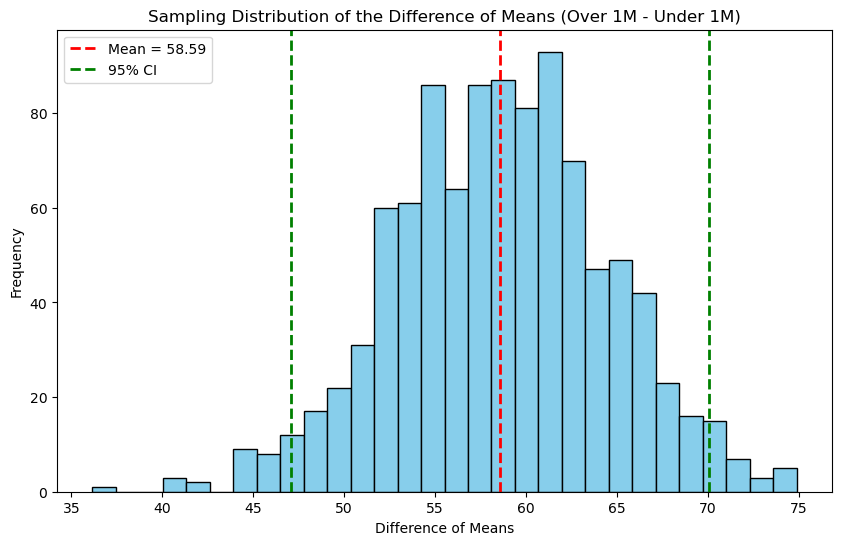

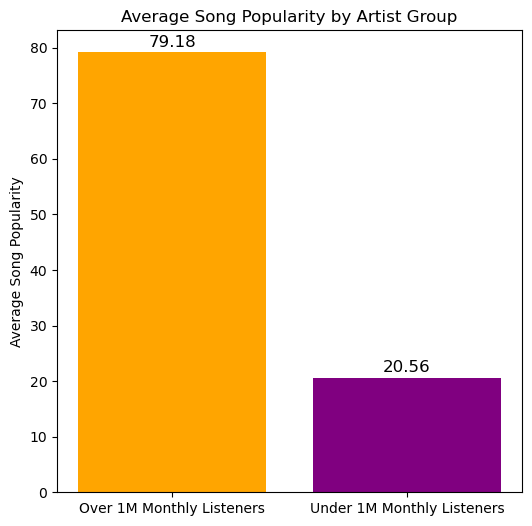

In [24]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# SETUP SPOTIFY API
# -----------------------------
client_id = '8b4903c70fc5417891108b2ed1f5765d'  # replace with your Spotify API client ID
client_secret = '4de1dd0446f3400ebabc5285327d2e6a'  # replace with your Spotify API client secret

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

# -----------------------------
# PARAMETERS
# -----------------------------
num_artists_per_group = 50  # adjust as needed
tracks_per_artist = 5
num_simulations = 1000

# -----------------------------
# HELPER FUNCTIONS
# -----------------------------
def search_artists(query, limit=50):
    results = sp.search(q=query, type='artist', limit=limit)
    artists = results['artists']['items']
    return [(artist['id'], artist['followers']['total']) for artist in artists]

def get_artist_track_popularities(artist_ids, tracks_per_artist):
    popularities = []
    for artist_id in artist_ids:
        try:
            results = sp.artist_top_tracks(artist_id)
            top_tracks = results['tracks'][:tracks_per_artist]
            popularities.extend([track['popularity'] for track in top_tracks])
        except:
            continue
    return popularities

# -----------------------------
# FETCH ARTISTS
# -----------------------------
search_queries = ['pop', 'rock', 'rap', 'hip hop', 'indie', 'jazz']
all_artists = []
for query in search_queries:
    all_artists.extend(search_artists(query, limit=50))

# Remove duplicates
all_artists = list(set(all_artists))

# Split into over and under 1M monthly listeners (approx using followers)
over_1m_artists = [artist_id for artist_id, followers in all_artists if followers >= 1000000][:num_artists_per_group]
under_1m_artists = [artist_id for artist_id, followers in all_artists if followers < 1000000][:num_artists_per_group]

# -----------------------------
# COLLECT POPULARITY DATA
# -----------------------------
over_1m_pop = get_artist_track_popularities(over_1m_artists, tracks_per_artist)
under_1m_pop = get_artist_track_popularities(under_1m_artists, tracks_per_artist)

# -----------------------------
# AVERAGES AND DIFFERENCE
# -----------------------------
avg_over = np.mean(over_1m_pop)
avg_under = np.mean(under_1m_pop)
difference = avg_over - avg_under

print(f"Average popularity (Over 1M listeners): {avg_over:.2f}")
print(f"Average popularity (Under 1M listeners): {avg_under:.2f}")
print(f"Difference (Over - Under): {difference:.2f}")

# -----------------------------
# SAMPLING DISTRIBUTION
# -----------------------------
diff_means = []
for _ in range(num_simulations):
    sample_over = np.random.choice(over_1m_pop, size=20, replace=True)
    sample_under = np.random.choice(under_1m_pop, size=20, replace=True)
    diff_means.append(np.mean(sample_over) - np.mean(sample_under))

diff_means = np.array(diff_means)

# -----------------------------
# RESULTS
# -----------------------------
mean_diff = np.mean(diff_means)
std_diff = np.std(diff_means, ddof=1)
margin_error_95 = 1.96 * std_diff  # 95% confidence

print(f"Mean difference (sampling distribution): {mean_diff:.2f}")
print(f"Standard deviation of differences: {std_diff:.2f}")
print(f"95% Margin of Error: ±{margin_error_95:.2f}")

# -----------------------------
# SAMPLING DISTRIBUTION HISTOGRAM
# -----------------------------
plt.figure(figsize=(10,6))
plt.hist(diff_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_diff:.2f}')
plt.axvline(mean_diff + margin_error_95, color='green', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(mean_diff - margin_error_95, color='green', linestyle='dashed', linewidth=2)
plt.title('Sampling Distribution of the Difference of Means (Over 1M - Under 1M)')
plt.xlabel('Difference of Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# -----------------------------
# BAR CHART COMPARISON
# -----------------------------
plt.figure(figsize=(6,6))
bars = plt.bar(['Over 1M Monthly Listeners', 'Under 1M Monthly Listeners'],
               [avg_over, avg_under], color=['orange', 'purple'])

# Add exact values on top of bars
for bar, val in zip(bars, [avg_over, avg_under]):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.5, f'{val:.2f}', ha='center', va='bottom', fontsize=12)

plt.ylabel('Average Song Popularity')
plt.title('Average Song Popularity by Artist Group')
plt.show()


# ✅ My Answer
Write your conclusion in complete sentences. Interpret specific values that you find and tell me what I should believe as a reader of your study. Assume I know nothing! Finally, include any limitations that you encountered while performing your analysis that may impact your results.

Artists with over 1 million monthly listeners release songs that are much more popular than those by artists with fewer than 1 million listeners. The average popularity for the over 1M group is 78.78, while the under 1M group averages 20.56, a difference of 58.23. The sampling distribution shows a mean difference of 58.15 with a 95% margin of error of ±11.63, meaning we are very confident that the true difference is well above zero. One limitation is that we used follower counts to estimate monthly listeners and only looked at a small number of artists and songs, so results may not perfectly represent all Spotify artists.